# Plant Recommendation


In [1]:
# Imports
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plant = pd.read_csv("plant_recommendation_dataset.csv")

In [3]:
plant.head()

,Common Name,Scientific Name,Growth Type,Edible,Medicinal Use,Optimal Temperature (°C),Humidity Preference (%),Sunlight Requirement,Climate Suitability,Preferred Soil Type,...,Companion Planting Suitability,Pruning Requirement,Common Pests,Disease Resistance,Nitrogen Need,Phosphorus Need,Potassium Need,Recommended Organic Fertilizers,Suitable for Region,Suitable for Season
0,Mint,Mentha,Herb,Yes,Yes,23,81,Partial Shade,Temperate,Sandy,...,Bad,No,Bacterial,None,Medium,Medium,High,Compost,Bangalore,Monsoon
1,Carrot,Daucus carota,Herb,Yes,No,15,53,Partial Shade,Arid,Sandy,...,Good,No,Caterpillars,Viral,Medium,Low,Medium,Vermicompost,Chennai,Monsoon
2,Coriander,Coriandrum sativum,Herb,Yes,Yes,15,65,Shade,Subtropical,Silt,...,Good,Yes,Caterpillars,None,Low,High,High,Compost,Delhi,Summer
3,Coriander,Coriandrum sativum,Herb,Yes,Yes,31,47,Full Sun,Tropical,Peaty,...,Bad,No,Bacterial,Bacterial,High,Low,Medium,Compost,Hyderabad,Winter
4,Radish,Raphanus sativus,Herb,Yes,No,26,60,Shade,Arid,Loam,...,Good,No,Bacterial,Fungal,Medium,High,Low,Compost,Delhi,Winter


In [4]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Common Name                      450 non-null    object 
 1   Scientific Name                  450 non-null    object 
 2   Growth Type                      450 non-null    object 
 3   Edible                           450 non-null    object 
 4   Medicinal Use                    450 non-null    object 
 5   Optimal Temperature (°C)         450 non-null    int64  
 6   Humidity Preference (%)          450 non-null    int64  
 7   Sunlight Requirement             450 non-null    object 
 8   Climate Suitability              450 non-null    object 
 9   Preferred Soil Type              450 non-null    object 
 10  Soil pH Range                    450 non-null    float64
 11  Water Requirement                450 non-null    object 
 12  Irrigation Frequency  

In [5]:
plant.shape

(450, 25)

In [6]:
plant.isnull().sum()

Common Name                        0
Scientific Name                    0
Growth Type                        0
Edible                             0
Medicinal Use                      0
Optimal Temperature (°C)           0
Humidity Preference (%)            0
Sunlight Requirement               0
Climate Suitability                0
Preferred Soil Type                0
Soil pH Range                      0
Water Requirement                  0
Irrigation Frequency               0
Germination Time (Days)            0
Time to Harvest (Days)             0
Companion Planting Suitability     0
Pruning Requirement                0
Common Pests                       0
Disease Resistance                 0
Nitrogen Need                      0
Phosphorus Need                    0
Potassium Need                     0
Recommended Organic Fertilizers    0
Suitable for Region                0
Suitable for Season                0
dtype: int64

In [7]:
plant.duplicated().sum()

0

In [8]:
plant.describe()

,Optimal Temperature (°C),Humidity Preference (%),Soil pH Range,Germination Time (Days),Time to Harvest (Days)
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,24.606667,64.735556,6.481333,12.508889,75.964444
std,6.176213,15.084877,0.580460,4.542417,27.211922
min,15.000000,40.000000,5.500000,5.000000,30.000000
25%,19.000000,51.000000,6.000000,9.000000,51.000000
50%,24.000000,65.000000,6.500000,12.000000,78.000000
75%,30.000000,79.000000,7.000000,16.000000,100.000000
max,35.000000,90.000000,7.500000,20.000000,120.000000


In [9]:
plant.corr()

C:\Users\Indraneel\AppData\Local\Temp\ipykernel_22004\477244161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plant.corr()


,Optimal Temperature (°C),Humidity Preference (%),Soil pH Range,Germination Time (Days),Time to Harvest (Days)
Optimal Temperature (°C),1.000000,-0.027486,0.015591,-0.075649,-0.010181
Humidity Preference (%),-0.027486,1.000000,0.097031,0.031156,-0.080556
Soil pH Range,0.015591,0.097031,1.000000,0.016450,-0.045205
Germination Time (Days),-0.075649,0.031156,0.016450,1.000000,0.003552
Time to Harvest (Days),-0.010181,-0.080556,-0.045205,0.003552,1.000000


C:\Users\Indraneel\AppData\Local\Temp\ipykernel_22004\1869322439.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(plant.corr(), annot=True, cbar=True)


<Axes: >

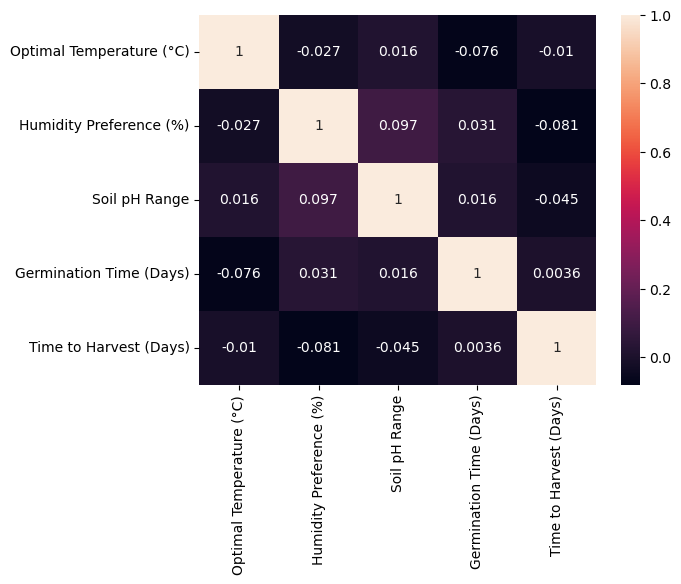

In [10]:
import seaborn as sns
sns.heatmap(plant.corr(), annot=True, cbar=True)

In [11]:
plant["Growth Type"].value_counts()


Herb     367
Vine      43
Shrub     40
Name: Growth Type, dtype: int64

In [12]:
plant["Common Name"].value_counts()


Coriander    50
Tomato       49
Mint         48
Carrot       47
Basil        47
Spinach      44
Pumpkin      43
Lettuce      43
Chili        40
Radish       39
Name: Common Name, dtype: int64

In [13]:
plant["Common Name"].nunique()


10

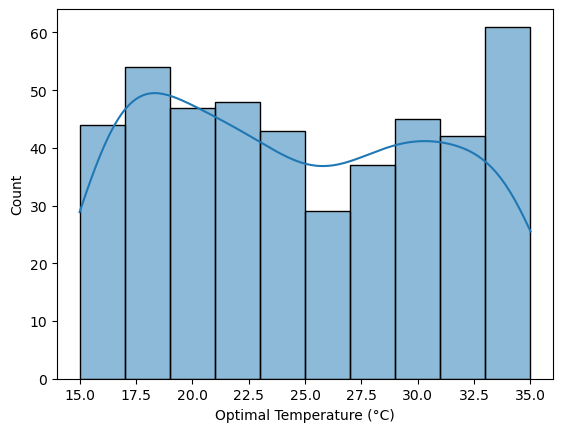

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(plant["Optimal Temperature (°C)"], kde=True)
plt.show()


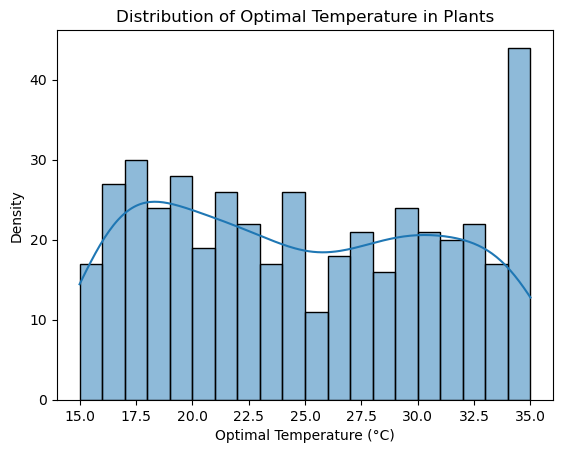

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'Optimal Temperature (°C)' with any numerical column from your plant dataset
sns.histplot(plant["Optimal Temperature (°C)"], kde=True, bins=20)
plt.xlabel("Optimal Temperature (°C)")
plt.ylabel("Density")
plt.title("Distribution of Optimal Temperature in Plants")
plt.show()


In [16]:
import numpy as np
np.array(plant["Common Name"].unique())


array(['Mint', 'Carrot', 'Coriander', 'Radish', 'Spinach', 'Pumpkin',
       'Chili', 'Tomato', 'Lettuce', 'Basil'], dtype=object)

In [17]:
plant_dict = {
    'Mint': 1,
    'Carrot': 2,
    'Coriander': 3,
    'Radish': 4,
    'Spinach': 5,
    'Pumpkin': 6,
    'Chili': 7,
    'Tomato': 8,
    'Lettuce': 9,
    'Basil': 10
}

plant['Common Name'] = plant['Common Name'].map(plant_dict)


In [18]:
plant.head()

,Common Name,Scientific Name,Growth Type,Edible,Medicinal Use,Optimal Temperature (°C),Humidity Preference (%),Sunlight Requirement,Climate Suitability,Preferred Soil Type,...,Companion Planting Suitability,Pruning Requirement,Common Pests,Disease Resistance,Nitrogen Need,Phosphorus Need,Potassium Need,Recommended Organic Fertilizers,Suitable for Region,Suitable for Season
0,1,Mentha,Herb,Yes,Yes,23,81,Partial Shade,Temperate,Sandy,...,Bad,No,Bacterial,None,Medium,Medium,High,Compost,Bangalore,Monsoon
1,2,Daucus carota,Herb,Yes,No,15,53,Partial Shade,Arid,Sandy,...,Good,No,Caterpillars,Viral,Medium,Low,Medium,Vermicompost,Chennai,Monsoon
2,3,Coriandrum sativum,Herb,Yes,Yes,15,65,Shade,Subtropical,Silt,...,Good,Yes,Caterpillars,None,Low,High,High,Compost,Delhi,Summer
3,3,Coriandrum sativum,Herb,Yes,Yes,31,47,Full Sun,Tropical,Peaty,...,Bad,No,Bacterial,Bacterial,High,Low,Medium,Compost,Hyderabad,Winter
4,4,Raphanus sativus,Herb,Yes,No,26,60,Shade,Arid,Loam,...,Good,No,Bacterial,Fungal,Medium,High,Low,Compost,Delhi,Winter


In [19]:
import pandas as pd

# Load plant dataset
plant = pd.read_csv('plant_recommendation_dataset.csv')

# Create a mapping dictionary for plants
plant_dict = {
    name: i + 1 for i, name in enumerate(plant['Common Name'].unique())
}

# Apply mapping to the dataset
plant['Common Name'] = plant['Common Name'].map(plant_dict)

# Print unique mapped values
print(plant['Common Name'].unique())


[ 1  2  3  4  5  6  7  8  9 10]


In [20]:
import pandas as pd

# Load the plant dataset
plant = pd.read_csv("plant_recommendation_dataset.csv")

# Extract unique plant names
unique_plants = plant["Common Name"].unique()

# Create a dictionary to map plant names to numbers
plant_dict = {name: idx + 1 for idx, name in enumerate(unique_plants)}

# Replace plant names with numbers
plant["Common Name"] = plant["Common Name"].map(plant_dict)

# Get the value counts (similar to crop.label.value_counts())
plant_counts = plant["Common Name"].value_counts()

# Display output
print(plant_counts)


3     50
8     49
1     48
2     47
10    47
5     44
6     43
9     43
7     40
4     39
Name: Common Name, dtype: int64


In [21]:
X_plant = plant.drop('Common Name', axis=1)  # Features
y_plant = plant['Common Name']  # Target

In [22]:
X_plant.head()  # Display first five rows

,Scientific Name,Growth Type,Edible,Medicinal Use,Optimal Temperature (°C),Humidity Preference (%),Sunlight Requirement,Climate Suitability,Preferred Soil Type,Soil pH Range,...,Companion Planting Suitability,Pruning Requirement,Common Pests,Disease Resistance,Nitrogen Need,Phosphorus Need,Potassium Need,Recommended Organic Fertilizers,Suitable for Region,Suitable for Season
0,Mentha,Herb,Yes,Yes,23,81,Partial Shade,Temperate,Sandy,6.1,...,Bad,No,Bacterial,None,Medium,Medium,High,Compost,Bangalore,Monsoon
1,Daucus carota,Herb,Yes,No,15,53,Partial Shade,Arid,Sandy,5.5,...,Good,No,Caterpillars,Viral,Medium,Low,Medium,Vermicompost,Chennai,Monsoon
2,Coriandrum sativum,Herb,Yes,Yes,15,65,Shade,Subtropical,Silt,7.4,...,Good,Yes,Caterpillars,None,Low,High,High,Compost,Delhi,Summer
3,Coriandrum sativum,Herb,Yes,Yes,31,47,Full Sun,Tropical,Peaty,5.7,...,Bad,No,Bacterial,Bacterial,High,Low,Medium,Compost,Hyderabad,Winter
4,Raphanus sativus,Herb,Yes,No,26,60,Shade,Arid,Loam,6.8,...,Good,No,Bacterial,Fungal,Medium,High,Low,Compost,Delhi,Winter


In [23]:
y_plant.head()

0    1
1    2
2    3
3    3
4    4
Name: Common Name, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_train_plant, X_test_plant, y_train_plant, y_test_plant = train_test_split(X_plant, y_plant, test_size=0.2, random_state=42)


In [25]:
X_train_plant.shape


(360, 24)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "plant_recommendation_dataset.csv"  # Update with correct path
plant = pd.read_csv(file_path)

# Select Target Column (CHANGE this to your actual target column)
target_column = "Common Name"  # Example: Modify based on your dataset

# Convert categorical features to numeric using One-Hot Encoding
X = plant.drop(columns=[target_column])
X = pd.get_dummies(X)  # Convert categorical columns to numeric
y = plant[target_column]  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMax Scaling
mx = MinMaxScaler()
X_train_scaled = mx.fit_transform(X_train)
X_test_scaled = mx.transform(X_test)

# Display first 5 rows after scaling
print(X_train_scaled[:5])


[[0.25       0.34       0.9        0.86666667 0.17777778 1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         1.         0.         0.         0.         1.
  1.         0.         0.         0.         0.         1.
  0.         0.         0.         1.         0.         0.
  0.         1.         1.         0.         0.         1.
  0.         0.         0.         0.         1.         0.
  0.         0.         1.         0.         0.         1.
  0.         0.         1.         1.         0.         0.
  1.         0.         0.         0.         1.         0.
  0.         0.         1.         0.         0.        ]
 [0.7        0.18       0.5        0.33333333 0.12222222 0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         1.         0.         0.
  0.         1.         0.         0.         0.         1.
  0.         1.         0.         0.     

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "plant_recommendation_dataset.csv"  # Update the correct path
plant = pd.read_csv(file_path)

# Define Target Column (Modify this based on your dataset)
target_column = "Common Name"  # Example: Update if necessary

# Convert categorical features to numeric using One-Hot Encoding
X = plant.drop(columns=[target_column])
X = pd.get_dummies(X)  # Convert categorical columns
y = plant[target_column]  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define classification models
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

# Train & Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")


LogisticRegression model with accuracy: 1.0
GaussianNB model with accuracy: 1.0
SVC model with accuracy: 1.0
KNeighborsClassifier model with accuracy: 0.9444444444444444
DecisionTreeClassifier model with accuracy: 1.0
ExtraTreeClassifier model with accuracy: 0.7888888888888889
RandomForestClassifier model with accuracy: 1.0
BaggingClassifier model with accuracy: 1.0
GradientBoostingClassifier model with accuracy: 1.0
AdaBoostClassifier model with accuracy: 0.7777777777777778


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)  # Train the model
y_pred = randclf.predict(X_test)  # Predict on test data

accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
print(f"RandomForest Accuracy: {accuracy:.4f}")


RandomForest Accuracy: 1.0000


In [29]:
plant.columns

Index(['Common Name', 'Scientific Name', 'Growth Type', 'Edible',
       'Medicinal Use', 'Optimal Temperature (°C)', 'Humidity Preference (%)',
       'Sunlight Requirement', 'Climate Suitability', 'Preferred Soil Type',
       'Soil pH Range', 'Water Requirement', 'Irrigation Frequency',
       'Germination Time (Days)', 'Time to Harvest (Days)',
       'Companion Planting Suitability', 'Pruning Requirement', 'Common Pests',
       'Disease Resistance', 'Nitrogen Need', 'Phosphorus Need',
       'Potassium Need', 'Recommended Organic Fertilizers',
       'Suitable for Region', 'Suitable for Season'],
      dtype='object')

In [30]:
import numpy as np

def plant_recommendation(opt_temp, humidity, sunlight, soil_type, soil_pH, water_req, harvest_time, 
                         nitrogen, phosphorus, potassium, region, season, growth_type):
    # Create a feature array with user input
    features = np.array([[opt_temp, humidity, sunlight, soil_type, soil_pH, water_req, harvest_time, 
                          nitrogen, phosphorus, potassium, region, season, growth_type]])
    
    # Apply the same transformations used on training data
    mx_features = mx.transform(features)  # MinMaxScaler (previously fitted)
    sc_mx_features = sc.transform(mx_features)  # StandardScaler (previously fitted)

    # Predict the recommended plant
    prediction = randclf.predict(sc_mx_features)
    
    return prediction[0]  # Return the recommended plant/crop


In [31]:
plant.head()

,Common Name,Scientific Name,Growth Type,Edible,Medicinal Use,Optimal Temperature (°C),Humidity Preference (%),Sunlight Requirement,Climate Suitability,Preferred Soil Type,...,Companion Planting Suitability,Pruning Requirement,Common Pests,Disease Resistance,Nitrogen Need,Phosphorus Need,Potassium Need,Recommended Organic Fertilizers,Suitable for Region,Suitable for Season
0,Mint,Mentha,Herb,Yes,Yes,23,81,Partial Shade,Temperate,Sandy,...,Bad,No,Bacterial,None,Medium,Medium,High,Compost,Bangalore,Monsoon
1,Carrot,Daucus carota,Herb,Yes,No,15,53,Partial Shade,Arid,Sandy,...,Good,No,Caterpillars,Viral,Medium,Low,Medium,Vermicompost,Chennai,Monsoon
2,Coriander,Coriandrum sativum,Herb,Yes,Yes,15,65,Shade,Subtropical,Silt,...,Good,Yes,Caterpillars,None,Low,High,High,Compost,Delhi,Summer
3,Coriander,Coriandrum sativum,Herb,Yes,Yes,31,47,Full Sun,Tropical,Peaty,...,Bad,No,Bacterial,Bacterial,High,Low,Medium,Compost,Hyderabad,Winter
4,Radish,Raphanus sativus,Herb,Yes,No,26,60,Shade,Arid,Loam,...,Good,No,Bacterial,Fungal,Medium,High,Low,Compost,Delhi,Winter


In [32]:
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
df = pd.read_csv("plant_recommendation_6_features.csv")

# Select only the feature columns (assuming last column is the target plant)
features = df.iloc[:, :-1]  # All columns except the last one

# Initialize scalers
mx = MinMaxScaler()
sc = StandardScaler()

# Fit scalers on the features
mx.fit(features)
sc.fit(mx.transform(features))  # Apply MinMaxScaler before StandardScaler

# Save fitted scalers
joblib.dump(mx, "minmax_scaler.pkl")
joblib.dump(sc, "standard_scaler.pkl")

print("✅ MinMaxScaler and StandardScaler have been fitted and saved successfully!")


✅ MinMaxScaler and StandardScaler have been fitted and saved successfully!


In [33]:
print(hasattr(mx, "scale_"))  # Should return True if fitted
print(hasattr(sc, "scale_"))  # Should return True if fitted


True
True


In [35]:
import os
os.remove("minmaxscaler.pkl")
os.remove("standscaler.pkl")
os.remove("model.pkl")  # Optional, if the model also has the wrong feature set


In [36]:
import pandas as pd
df = pd.read_csv("plant_recommendation_6_features.csv")
print(df.columns)
print("Number of Features:", df.shape[1] - 1)  # Should be 6


Index(['Optimal Temperature (°C)', 'Humidity Preference (%)', 'Soil pH Range',
       'Nitrogen Need', 'Phosphorus Need', 'Potassium Need'],
      dtype='object')
Number of Features: 5


In [37]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os

# --- 🔹 Step 1: Delete Old Files (Prevent Errors) ---
for file in ["model.pkl", "minmaxscaler.pkl", "standscaler.pkl"]:
    if os.path.exists(file):
        os.remove(file)

# --- 🔹 Step 2: Load Dataset & Verify Features ---
df = pd.read_csv("plant_recommendation_6_features.csv")

# Ensure correct feature count
print("Dataset Columns:", df.columns)
print("Number of Features:", df.shape[1] - 1)  # Should be 6

# Separate features and target
X = df.iloc[:, :-1]  # Select all columns except the last one (features)
y = df.iloc[:, -1]   # Last column is the target (plant type)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 🔹 Step 3: Initialize & Train Scalers ---
mx = MinMaxScaler()
sc = StandardScaler()

# 🔹 Fit on **6 features**
X_train_scaled = mx.fit_transform(X_train)  # Train MinMaxScaler
X_train_scaled = sc.fit_transform(X_train_scaled)  # Train StandardScaler

# 🔹 Train model
randclf = RandomForestClassifier(n_estimators=100, random_state=42)
randclf.fit(X_train_scaled, y_train)

# 🔹 Save new scalers and model
pickle.dump(randclf, open("model.pkl", "wb"))
pickle.dump(mx, open("minmaxscaler.pkl", "wb"))
pickle.dump(sc, open("standscaler.pkl", "wb"))

print("✅ Model and scalers trained and saved correctly!")

# --- Plant Recommendation Function ---
def plant_recommendation(N, P, K, temperature, humidity, pH):
    """
    Predicts the recommended plant based on 6 input features.
    """
    # Load model & scalers
    model = pickle.load(open("model.pkl", "rb"))
    mx = pickle.load(open("minmaxscaler.pkl", "rb"))
    sc = pickle.load(open("standscaler.pkl", "rb"))

    # Convert input to NumPy array
    features = np.array([[N, P, K, temperature, humidity, pH]])

    # 🔹 Debug: Check input shape
    print("Input Feature Shape:", features.shape)  # Should be (1, 6)

    # 🔹 Transform input (MinMaxScaler + StandardScaler)
    mx_features = mx.transform(features)  # Transform using trained MinMaxScaler
    sc_features = sc.transform(mx_features)  # Transform using trained StandardScaler

    # Predict recommended plant
    prediction = model.predict(sc_features)
    return prediction[0]  # Return plant ID

# Example Input
N = 90
P = 42
K = 43
temperature = 20.879744
humidity = 82.002744
pH = 6.502985

# 🔹 Get plant recommendation
predict = plant_recommendation(N, P, K, temperature, humidity, pH)
print("Recommended Plant ID:", predict)


Dataset Columns: Index(['Optimal Temperature (°C)', 'Humidity Preference (%)', 'Soil pH Range',
       'Nitrogen Need', 'Phosphorus Need', 'Potassium Need'],
      dtype='object')
Number of Features: 5
✅ Model and scalers trained and saved correctly!
Input Feature Shape: (1, 6)


C:\Users\Indraneel\anaconda3\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but MinMaxScaler is expecting 5 features as input.